In [125]:
import pandas as pd

temp = pd.read_csv('temp_cwb.csv', sep=';',header=0,infer_datetime_format=True, dayfirst=True ,parse_dates=['Data'],index_col=['Data'])
temp = temp.drop(columns=['Estacao','Unnamed: 5','Hora'])
daily_temp=temp.resample('D').mean()
daily_temp

,TempBulboSeco,TempBulboUmido
Data,,
2018-01-01,24.333333,21.133333
2018-01-02,23.200000,20.100000
2018-01-03,23.900000,19.133333
2018-01-04,22.933333,17.666667
2018-01-05,24.066667,18.000000
...,...,...
2020-02-26,20.450000,19.850000
2020-02-27,17.950000,15.850000
2020-02-28,16.750000,14.100000


In [126]:
temp

,TempBulboSeco,TempBulboUmido
Data,,
2018-01-01,21.1,20.4
2018-01-01,22.1,20.4
2018-01-01,29.8,22.6
2018-01-02,22.6,20.8
2018-01-02,22.4,19.3
...,...,...
2020-02-28,17.4,13.9
2020-02-28,16.1,14.3
2020-02-29,16.8,15.5


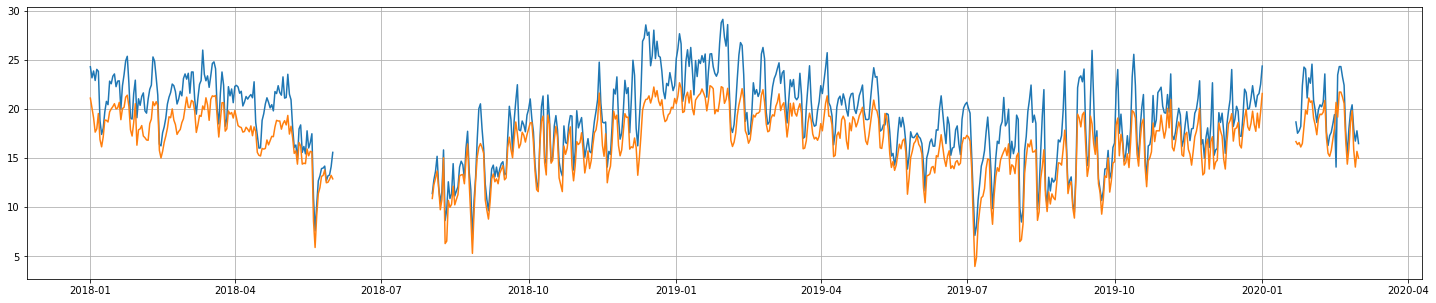

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25,5))
plt.plot(daily_temp['TempBulboSeco'])
plt.plot(daily_temp['TempBulboUmido'])
plt.grid()

Os dados de temperatura dos meses 06 e 07 de 2018 além dos primeiros dias de 2020 não estão registrados no conjunto de dados.

In [128]:
data=pd.read_csv("MeMas_5min.csv",header=0,infer_datetime_format=True,parse_dates=['Data'],index_col=['Data'])
daily_data=data.resample('D').sum()
daily_data

,Ativa
Data,
2018-04-22,15225.84
2018-04-23,27092.16
2018-04-24,27735.12
2018-04-25,28000.80
2018-04-26,29124.00
...,...
2020-02-11,21734.64
2020-02-12,21433.68
2020-02-13,21848.40


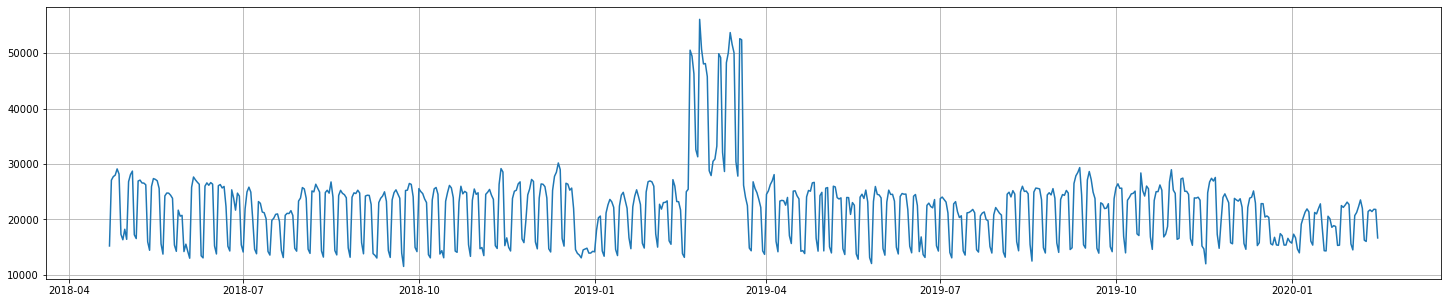

In [129]:
plt.figure(figsize=(25,5))
plt.plot(daily_data)
plt.grid()

Para essa análise vamos considerar um intervalo em que ambos os conjuntos tem dados disponíveis e podem ser comparados,
no caso de 02/08/2018 a 31/12/2019.

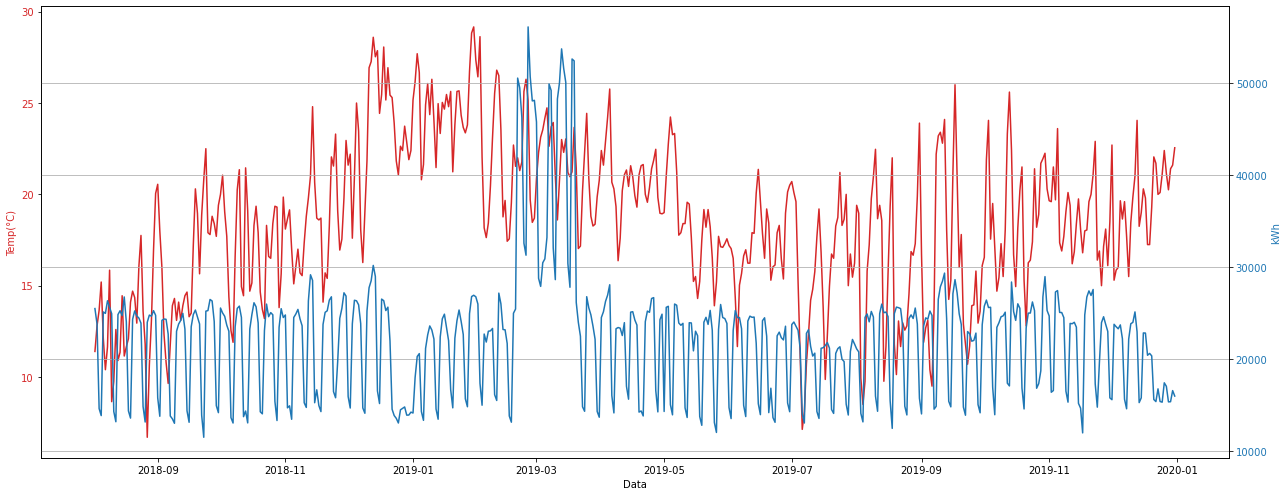

In [130]:
daily_data = daily_data.truncate('2018-08-02','2019-12-31')
daily_temp = daily_temp.truncate('2018-08-02','2019-12-31')

fig, ax1 = plt.subplots(figsize=(18,7))
color = 'tab:red'
ax1.set_xlabel('Data')
ax1.set_ylabel('Temp(°C)', color=color)
ax1.plot(daily_temp['TempBulboSeco'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('kWh', color=color)
ax2.plot(daily_data, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.grid()

O que é notável nesse gráfico é o aumento abrupto do consumo a partir do começo do ano letivo, não é possível confirmar que isso é algo que ocorre em todos os anos já que não temos dados de anos anteriores durante o mesmo período e 2020 é um nao atípico. É importante ressaltar que esses primeiros meses do ano são também os mais quentes, portanto esse aumento pode ser devido ao uso de ares condicionados.

In [131]:
conf_term0 = daily_temp
conf_term0 = conf_term0.drop(columns=['TempBulboUmido'])
conf_term = pd.DataFrame(index=conf_term0.index,columns=conf_term0.columns)
conf_term[conf_term0<999999]='Confortável'
conf_term[conf_term0>26.7]='Quente'
conf_term[conf_term0<20.3]='Frio'

conf_term

,TempBulboSeco
Data,
2018-08-02,Frio
2018-08-03,Frio
2018-08-04,Frio
2018-08-05,Frio
2018-08-06,Frio
...,...
2019-12-27,Confortável
2019-12-28,Frio
2019-12-29,Confortável
